# **10. AVL AND RED-BLACK TREES**



# BALANCED VS UNBALANCED

The AVL tree is createde to make a tree balanced. In AVL trees each node stores an additional piece of data: its height from the deepest leaf node in that subtree.

The number of nodes on the longest path from a particular node X to a leaf node is called **the height of the subtree rooted at node X**, or more simply, the height of X. Figure 10-5 shows the distinction between the level (or depth) of a node and the height of the subtree rooted at a node. In the sample tree, each subtree’s height is shown in orange next to the root node of the subtree. All the leaf nodes are at height 1 regardless of their depth. The height measures the longest path below the node (to an empty child), and the level measures the distance to the tree root.

For balance, you want to measure the difference in height between the two child branches of a node. You can subtract the right child’s height from the left child’s height to get the difference. When a node has only one child like nodes 17, 21, 65, and 80 do in Figure 10-4, the height of the empty child is considered zero. That way the height difference is either +1 or –1 for a node having a single leaf node as a child, like nodes 17 and 21. You want to ensure that the imbalance of those nodes is counted.

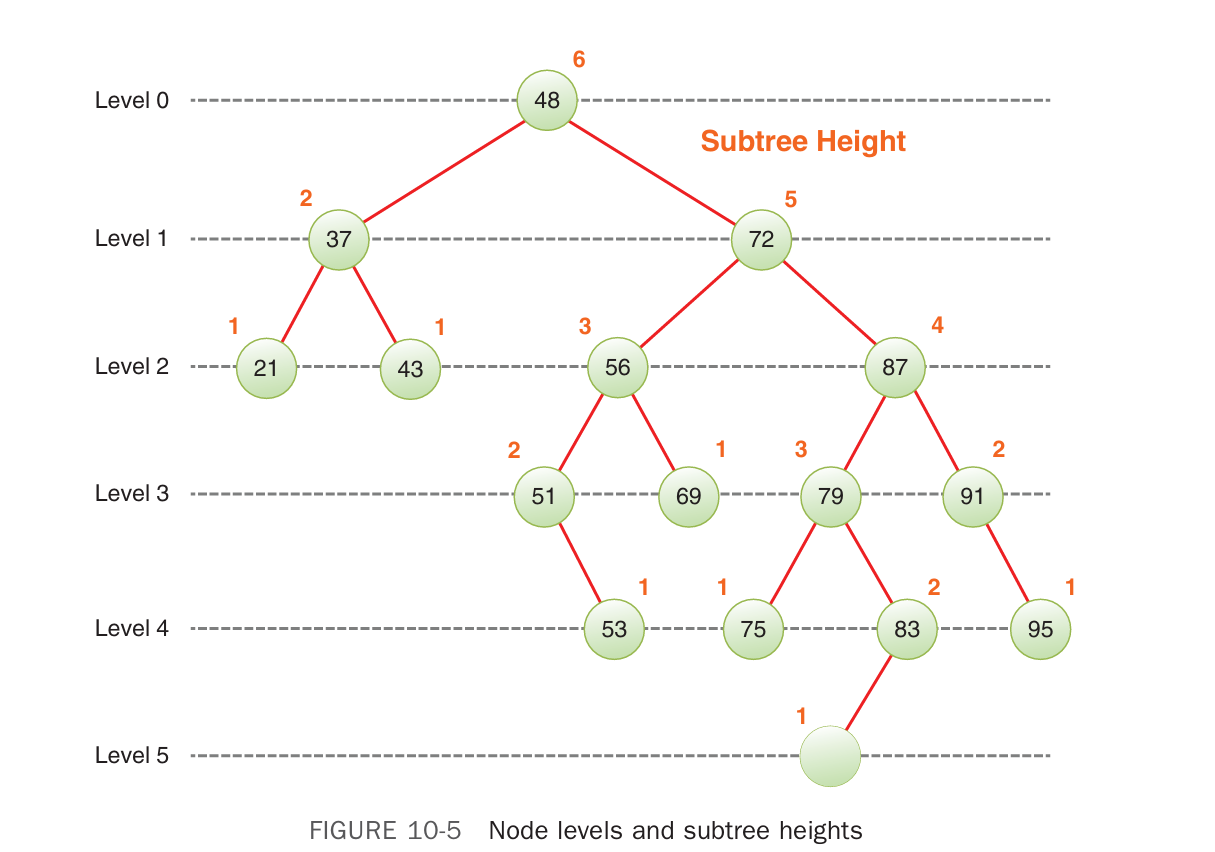

In [1]:
from IPython.display import Image, display
display(Image(filename="picture1.png", width=500))

Totaling up the absolute values of the height differences gives a different overall tree metric.

1) For the unbalanced tree in Figure 10-3, the total is 10 (three each for nodes 27 and 65 at level 1, two each for nodes 16 and 93 at level 2, and zero for all the others).

2) The tree in Figure 10-4 would have a total of 4 (one for each of nodes 17, 21, 65, and 80).

This overall metric is the same as the total of node count differences. Both find that there are 4 nodes with imbalance of one between their left and right sides.

In [3]:
from IPython.display import Image, display, HTML

display(HTML("""
    <div style="display: flex; justify-content: center; gap: 6px;">
        <img src="picture2.png" width="300"/>
        <img src="picture3.png" width="300"/>
    </div>
"""))

Defining balance to be metric = 0 is not a very practical definition because you’d like the binary trees to behave something like the 2-3-4 trees, which can contain any number of nodes and still be considered balanced. Balancing binary trees is about keeping the maximum height of any node to a minimum so that the longest search path is no longer than 
necessary. That’s exactly the case in Figure 10-4, so that tree’s metric should come out balanced. 

# AVL TREE

The AVL tree is a modified binary search tree that adds a height attribute to each node. The height differences between the left and right children of a node can be used to mea
sure its balance. When the absolute height difference at any subtree becomes larger than one, rotations are used to correct the imbalance. Let’s look first at those rotations.

The basic idea of the AVL tree is to use the additional height attribute in every node to determine the balance of its parent node. When an imbalance of more than one is created 
by an insertion or deletion, it will be corrected by using rotations.

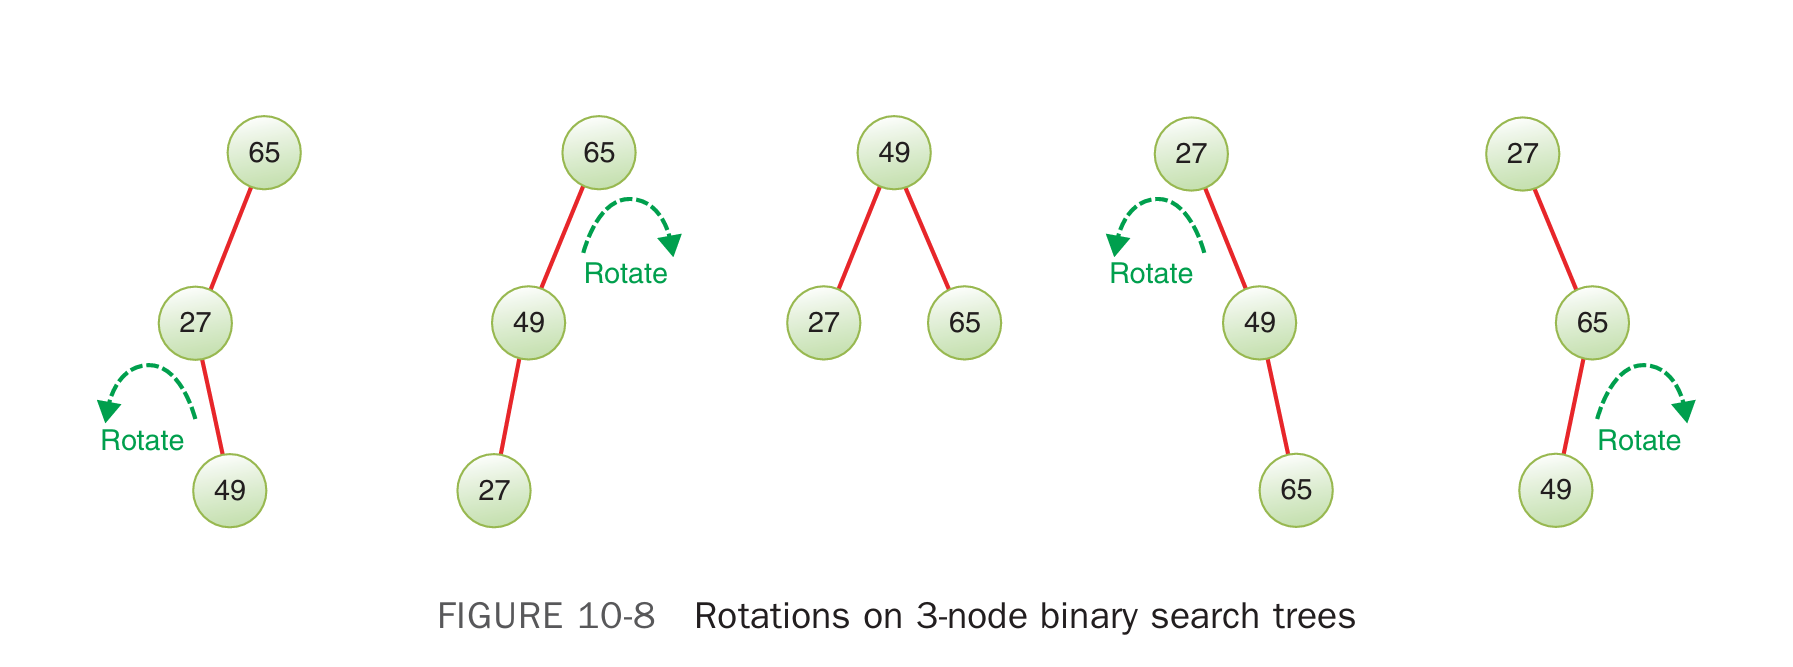

In [6]:
from IPython.display import Image, display
display(Image(filename="picture4.png", width=700))

In [ ]:
# Implement AVL trees using Tree and Node classes
# These are balanced binary trees

from LinkStack import *
    
class AVLtree(object):

# To preserve node integrity, node keys and children links should
# not be accessible from the caller, so we make the entire
# Node class hidden, but leave its attributes public for ease
# of manipulating them in the Tree class

   class __Node(object):      # A node in an AVL tree
      def __init__(           # Constructor takes a key-data pair
            self,             # since every node must have 1 item
            key, data):
         self.key, self.data = key, data # Store item key & data
         self.left = self.right = None   # Empty child links
         self.updateHeight()  # Set initial height of node
    
      def updateHeight(self): # Update height of node from children
         self.height = max(   # Get maximum child height using 0 for
            child.height if child else 0 # empty child links
            for child in (self.left, self.right)
         ) + 1                # Add 1 for this node
     
      def heightDiff(self):   # Return difference in child heights
         left  = self.left.height  if self.left  else 0
         right = self.right.height if self.right else 0
         return left - right  # Return difference in heights

      def __str__(self):      # Represent a node as a string using a
         return 'AVL>' + str(self.key) # prefix and its key
     
   def __init__(self):        # Constructor for empty AVL tree
      self.__root = None      # No root node in empty tree

   def isEmpty(self):         # Check for empty tree
      return self.__root is None

   def __find(self, goal, node): # Find a node that matches goal key
      while node is not None: # Loop until we reach an empty link
         if node.key == goal: # Check if current node's key matches
            return node       # and return it if it does
         elif goal < node.key: # Else if goal is below current node,
            node = node.left  # then search left subtree
         else:
            node = node.right # Else search the right subtree
      return None             # If loop ends, goal wasn't found

   def search(self, goal):    # Search for an item whose key matches a
      node = self.__find(goal, self.__root) # goal starting at root
      if node is not None:    # Return the node's data, if found
         return node.data
   
   def insert(self, key, data): # Insert an item into the AVL tree
      self.__root, flag = self.__insert( # Reset the root to be the
         self.__root, key, data) # modified tree and return the
      return flag             # the insert vs. update flag
      
   def __insert(self,         # Insert an item into an AVL subtree
                node,         # rooted a particular node, returning
                key, data):   # the modified node & insertion flag
      if node is None:        # For an empty subtree, return a new
         return self.__Node(key, data), True # node in the tree
      
      if key == node.key:     # If node already has the insert key,
         node.data = data     # then update it with the new data
         return node, False   # Return the node and False for flag
          
      elif key < node.key:    # Does the key belong in left subtree?
         node.left, flag = self.__insert( # If so, insert on left and
            node.left, key, data) # update the left link
         if node.heightDiff() > 1: # If insert made node left heavy

            if node.left.key < key: # If inside grandchild inserted,
               node.left = self.rotateLeft( # then raise grandchild
                  node.left) 
                   
            node = self.rotateRight( # Correct left heavy tree by
               node)          # rotating right around this node
          
      else:                   # Otherwise key belongs in right subtree
         node.right, flag = self.__insert( # Insert it on right and
            node.right, key, data) # update the right link
         if node.heightDiff() < -1: # If insert made node right heavy

            if key < node.right.key: # If inside grandchild inserted,
               node.right = self.rotateRight( # then raise grandchild
                  node.right) 
                   
            node = self.rotateLeft( # Correct right heavy tree by
               node)          # rotating left around this node
       
      node.updateHeight()     # Update this node's height
      return node, flag       # Return the updated node & insert flag

   def rotateRight(self, top): # Rotate a subtree to the right
      toRaise = top.left      # The node to raise is top's left child
      top.left = toRaise.right # The raised node's right crosses over
      toRaise.right = top     # to be the left subtree under the old
      top.updateHeight()      # top.  Then the heights must be updated
      toRaise.updateHeight()
      return toRaise          # Return raised node to update parent

   def rotateLeft(self, top): # Rotate a subtree to the left
      toRaise = top.right     # The node to raise is top's right child
      top.right = toRaise.left # The raised node's left crosses over
      toRaise.left = top      # to be the right subtree under the old
      top.updateHeight()      # top.  Then the heights must be updated
      toRaise.updateHeight()
      return toRaise          # Return raised node to update parent

   def traverse(self,         # Non-recursive generator to traverse
                traverseType='in'): # tree in pre, in, or post order
      if traverseType not in [ # Verify traversal type is an
            'pre', 'in', 'post']: # accepted value
         raise ValueError(
            "Unknown traversal type: " + str(traverseType))
      
      stack = Stack()         # Create a stack
      stack.push(self.__root) # Put root node in stack
      
      while not stack.isEmpty(): # While there is work in the stack
         item = stack.pop() # Get next item
         if isinstance(item, self.__Node): # If it's a tree node
            if traverseType == 'post': # For post-order, put it last
               stack.push((item.key, item.data))
            stack.push(item.right) # Traverse right child
            if traverseType == 'in': # For pre-order, put item 2nd
               stack.push((item.key, item.data))
            stack.push(item.left)  # Traverse left child
            if traverseType == 'pre': # For pre-order, put item 1st
               stack.push((item.key, item.data))
         elif item:           # Every other non-None item is a
            yield item        # (key, value) pair to be yielded

   def print(self,            # Print a tree sideways with 1 node
             indentBy=15):     # on each line and indenting each level
      self.__pTree(self.__root, # by some blanks.  Start at root node
                   "", indentBy) # with no indent
       
   def __pTree(self,          # Recursively print a subtree, sideways 
               node,          # with the root node left justified
               indent,        # using indent as prefix for its level
               indentBy=15):   # Increase indent level for subtrees
      if node:                # Only print if there is a node
         self.__pTree(node.right,  # Print the right subtree
                      indent + " " * indentBy, indentBy)
         print(indent, node, '(',  # Print this node, its height, &
               node.height, node.heightDiff(), ')') # balsnce
         self.__pTree(node.left,   # Print the left subtree
                      indent + " " * indentBy, indentBy)
         
   def __str__(self):         # Show tree in string form as key-value
      return '{{{}}}'.format( # pairs surrounded in curly braces
         ', '.join('{}: {}'.format( # Pairs are formatted key: value
            repr(key), repr(val))
                   for key, val in self.traverse('pre')))
   
   def delete(self, goal):    # Delete a node whose key matches goal
      self.__root, flag = self.__delete( # Delete starting at root and
         self.__root, goal)   # update root link
      return flag             # Return flag indicating goal node found
      
   def __delete(self,         # Delete matching goal key from subtree
                node, goal):  # rooted at node. Return modified node
      if node is None:        # If subtree is empty,
         return None, False   # then no matching goal key
      
      if goal < node.key:     # Is node to delete in left subtree?
         node.left, flag = self.__delete( # If so, delete from left
            node.left, goal)  # update the left link and store flag
         node = self.__balanceLeft(node) # Correct any imbalance

      elif goal > node.key:   # Is node to delete in right subtree?
         node.right, flag = self.__delete( # If so, delete from right
            node.right, goal) # update the right link and store flag
         node = self.__balanceRight(node) # Correct any imbalance
            
      # Else node's key matches goal, so determine deletion case
      elif node.left is None: # If no left child, return right child
         return node.right, True # as remainder, flagging deletion
      elif node.right is None: # If no right child, return left child
         return node.left, True # as remainder, flagging deletion
      # Deleted node has two children so find successor in right
      else:                   # subtree and replace this item 
         node.key, node.data, node.right= self.__deleteMin(node.right)
         node = self.__balanceRight(node) # Correct any imbalance
         flag = True          # The goal was found and deleted

      node.updateHeight()     # Update height of node after deletion
      return node, flag       # Return modified node and delete flag

   def __deleteMin(           # Find minimum node of subtree, delete
         self,                # it, return minimum key, data pair and
         node):               # updated link to parent
      if node.left is None:   # If left child link is empty, then
         return (node.key, node.data, # this node is minimum and its
                 node.right)  # right subtree, if any, replaces it
      key, data, node.left = self.__deleteMin( # Else, delete minimum
         node.left)           # from left subtree
      node = self.__balanceLeft(node) # Correct any imbalance
      node.updateHeight()     # Update height of node
      return (key, data, node)
         
   def __balanceLeft(self, node): # Rebalance after left deletion
      if node.heightDiff() < -1: # If node is right heavy, then
         if node.right.heightDiff() > 0: # If the right child is left
            node.right = self.rotateRight( # heavy, then rotate
               node.right)    # it to the right first
            
         node = self.rotateLeft( # Correct right heavy tree by
            node)             # rotating left around this node
      return node             # Return top node

   def __balanceRight(self, node): # Rebalance after right deletion
      if node.heightDiff() > 1: # If node is left heavy, then
         if node.left.heightDiff() < 0: # If the left child is right
            node.left = self.rotateLeft( # heavy, then rotate
               node.left)     # it to the left first
            
         node = self.rotateRight( # Correct left heavy tree by
            node)             # rotating right around this node
      return node             # Return top node


In [3]:
from AVLtree import *
import sys

# initialize a tree
t = AVLtree()
keys = [10, 7, 12, 3, 9, 6, 7]

# show how values are inserted into a tree
count = 0
for key in keys:
    print(f'Inserting {key} returns {t.insert(key, count)}')
    count += 1
    print(f'After inserting {key} : {count} the tree contains\n')
    print()
    t.print()
    print()
    print()

Inserting 10 returns True
After inserting 10 : 1 the tree contains


 AVL>10 ( 1 0 )


Inserting 7 returns True
After inserting 7 : 2 the tree contains


 AVL>10 ( 2 1 )
                AVL>7 ( 1 0 )


Inserting 12 returns True
After inserting 12 : 3 the tree contains


                AVL>12 ( 1 0 )
 AVL>10 ( 2 0 )
                AVL>7 ( 1 0 )


Inserting 3 returns True
After inserting 3 : 4 the tree contains


                AVL>12 ( 1 0 )
 AVL>10 ( 3 1 )
                AVL>7 ( 2 1 )
                               AVL>3 ( 1 0 )


Inserting 9 returns True
After inserting 9 : 5 the tree contains


                AVL>12 ( 1 0 )
 AVL>10 ( 3 1 )
                               AVL>9 ( 1 0 )
                AVL>7 ( 2 0 )
                               AVL>3 ( 1 0 )


Inserting 6 returns True
After inserting 6 : 6 the tree contains


                               AVL>12 ( 1 0 )
                AVL>10 ( 2 0 )
                               AVL>9 ( 1 0 )
 AVL>7 ( 3 0 )
                   

In [4]:
# in order traverse display (sorted value)
print("Traversing the tree in-order:")
for key, val in t.traverse('in'):
    print(f'Key {key} has value {val}\n')

Traversing the tree in-order:
Key 3 has value 3

Key 6 has value 5

Key 7 has value 6

Key 9 has value 4

Key 10 has value 0

Key 12 has value 2



In [5]:
# delete values in tree
for key in keys:
    delFlag = t.delete(key)
    print(f'Delegting {key} returns {delFlag}')
    if delFlag:
        print(f'After deleting specified key {key}: the tree contains\n')
        print()
        t.print()
        print()
        print()

Delegting 10 returns True
After deleting specified key 10: the tree contains


                AVL>12 ( 2 1 )
                               AVL>9 ( 1 0 )
 AVL>7 ( 3 0 )
                               AVL>6 ( 1 0 )
                AVL>3 ( 2 -1 )


Delegting 7 returns True
After deleting specified key 7: the tree contains


                AVL>12 ( 1 0 )
 AVL>9 ( 3 1 )
                               AVL>6 ( 1 0 )
                AVL>3 ( 2 -1 )


Delegting 12 returns True
After deleting specified key 12: the tree contains


                AVL>9 ( 1 0 )
 AVL>6 ( 2 0 )
                AVL>3 ( 1 0 )


Delegting 3 returns True
After deleting specified key 3: the tree contains


                AVL>9 ( 1 0 )
 AVL>6 ( 2 -1 )


Delegting 9 returns True
After deleting specified key 9: the tree contains


 AVL>6 ( 1 0 )


Delegting 6 returns True
After deleting specified key 6: the tree contains




Delegting 7 returns False


# EFFICIENCY OF AVL TREES

Because AVL trees are similar to binary search trees, their efficiency is similar. There is the added storage cost of keeping the height with each node and the added time it takes to update that attribute and rebalance subtrees during insertions and deletions. That extra Work produces balanced, binary trees, which you know have a search time of **O(log N)**. Best of all, the search time doesn’t degrade to **O(N)** for degenerate cases.

How much do you have to pay to get the benefits of balance?

* In the worst case, every level would call `heightDiff()` once and make two rotations (which call `updateHeight()` twice each). That’s quite a bit, but it’s still a fixed amount of work that doesn’t depend on the number of nodes in the tree. All the added manipulations increase the amount of work done per recursive level by a constant amount. In Big O notation, you can ignore the constant amount and conclude that insertion is **O(log N)** because the only thing that grows with N is the number of levels.

* Deletion as an **O(log N)** operation.

* In terms of memory used it is **O(N)** because you need a fixed amount of memory for every node, and there is exactly one node for every item stored. The  constant that multiplies the number of items, however, has grown because you added the height attribute to the tree. Somewhat harder to see is that the height attribute needs to be big enough to accurately count the height of each subtree. If you used a single byte for the height, then it could only count up to a height of 255. That limitation could become a problem for a huge number of items. A full machine word could be used to store the height, which would be 64 (or possibly 32) bits, allowing for extremely deep trees.